##**Import Libararies and Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px

## **Data Pre-Processing and Analysis**

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# check the negative quantity in the data
quantity_=df.loc[df['Quantity'] <0]
quantity_

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# take the items with positive quantity
df = df.loc[df['Quantity'] > 0] 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.dtypes #columns types in data

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.apply(lambda x: sum(x.isnull()),axis=0) # check Nans

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [ ]:
data =df.dropna() # remove missing values

In [ ]:
data.apply(lambda x: sum(x.isnull()),axis=0) # check data after removing missing values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.shape

(397924, 8)

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']) #convert the InvoiceDate to time and date
data['year'] = data['InvoiceDate'].dt.year

<ipython-input-10-134aea370732>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']) #convert the InvoiceDate to time and date
<ipython-input-10-134aea370732>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['InvoiceDate'].dt.year


In [ ]:
data['year'].value_counts().sort_index() #check distribution or years 

2010     26160
2011    371764
Name: year, dtype: int64

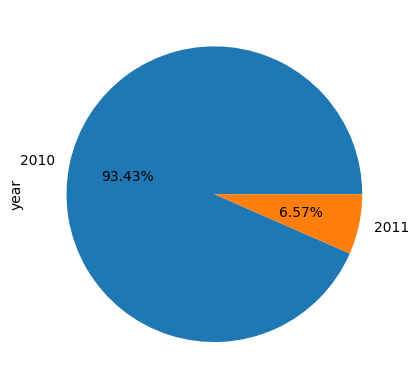

In [ ]:
data['year'].value_counts().plot.pie(labels=data['year'].unique(),autopct = '%1.2f%%')
plt.show()

In [ ]:
#check each StockCode and count the items for each
counts = data['StockCode'].value_counts()
counts_df = pd.DataFrame({'StockCode':counts.index,'Counts':counts.values})
counts_df

,StockCode,Counts
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397
...,...,...
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1


In [ ]:
Category=data['StockCode'].unique()
print(len(Category))

3665


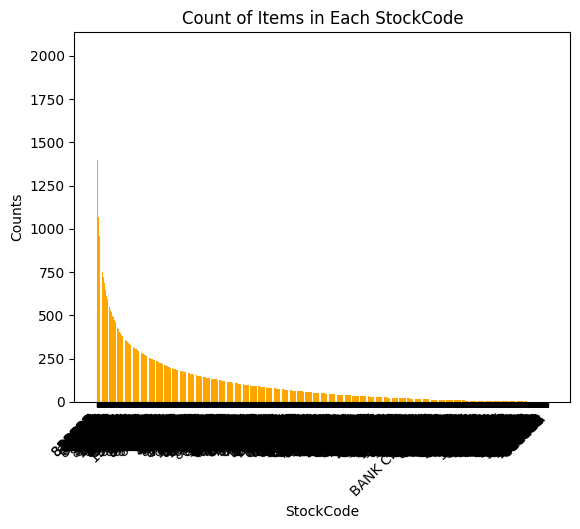

In [ ]:
fig, ax = plt.subplots()
ax.bar(counts_df['StockCode'], counts_df['Counts'], color='orange')
ax.set_xlabel('StockCode')
ax.set_ylabel('Counts')
ax.set_title('Count of Items in Each StockCode')
ax.set_xticks(range(len(counts_df['StockCode'])))
ax.set_xticklabels(counts_df['StockCode'], rotation=45, ha='right')
plt.show()

In [ ]:
px.bar(data_frame=counts_df,
 x='Counts',
 y='StockCode',
 color='Counts',
 color_continuous_scale='Oranges',
 text_auto=True,
 title=f'Count of Items in Each StockCode')

In [ ]:
# chaoose an customer to dispaly the transcations and items
data[data.CustomerID == 17850.0].sort_values('InvoiceDate') 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
4527,536790,71053,WHITE METAL LANTERN,12,2010-12-02 15:26:00,3.39,17850.0,United Kingdom,2010
4526,536790,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2010-12-02 15:26:00,2.95,17850.0,United Kingdom,2010
4534,536790,82483,WOOD 2 DRAWER CABINET WHITE FINISH,4,2010-12-02 15:26:00,4.95,17850.0,United Kingdom,2010
4543,536791,22632,HAND WARMER RED POLKA DOT,12,2010-12-02 15:27:00,1.85,17850.0,United Kingdom,2010


In [ ]:
data["CustomerID"].size # check the curomers numbers

397924

<Axes: xlabel='count', ylabel='Country'>

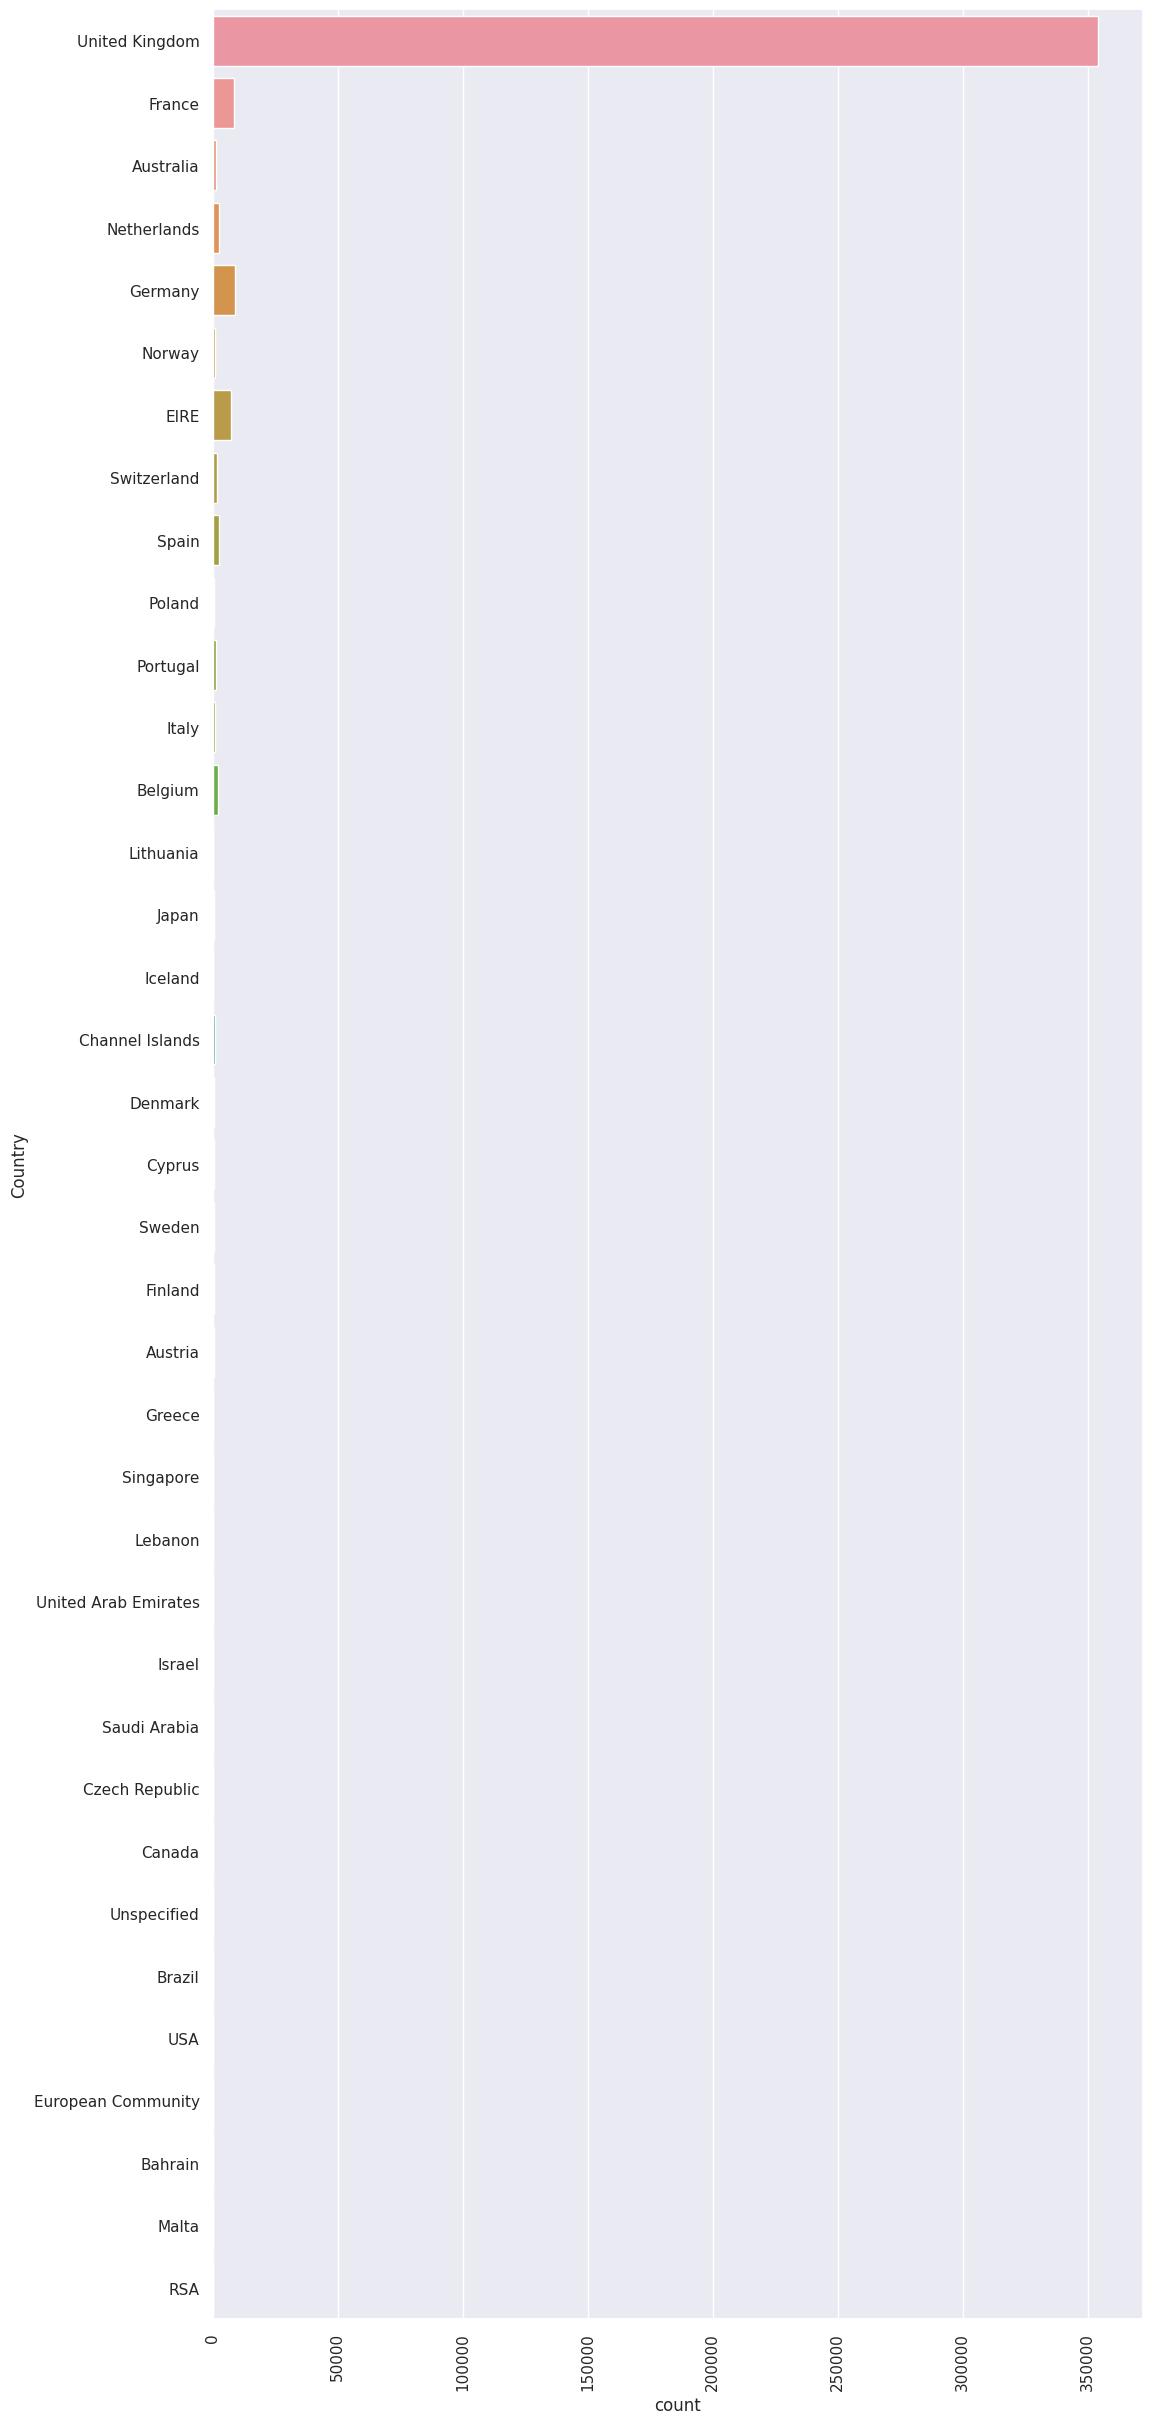

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="Country", data=data)
# print(df["Country"].value_counts())

In [ ]:
country = data[data["Country"] != "United Kingdom"] # check the other countries 
country

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,2010
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,2010
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,2010
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,2010
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011


<Axes: xlabel='count', ylabel='Country'>

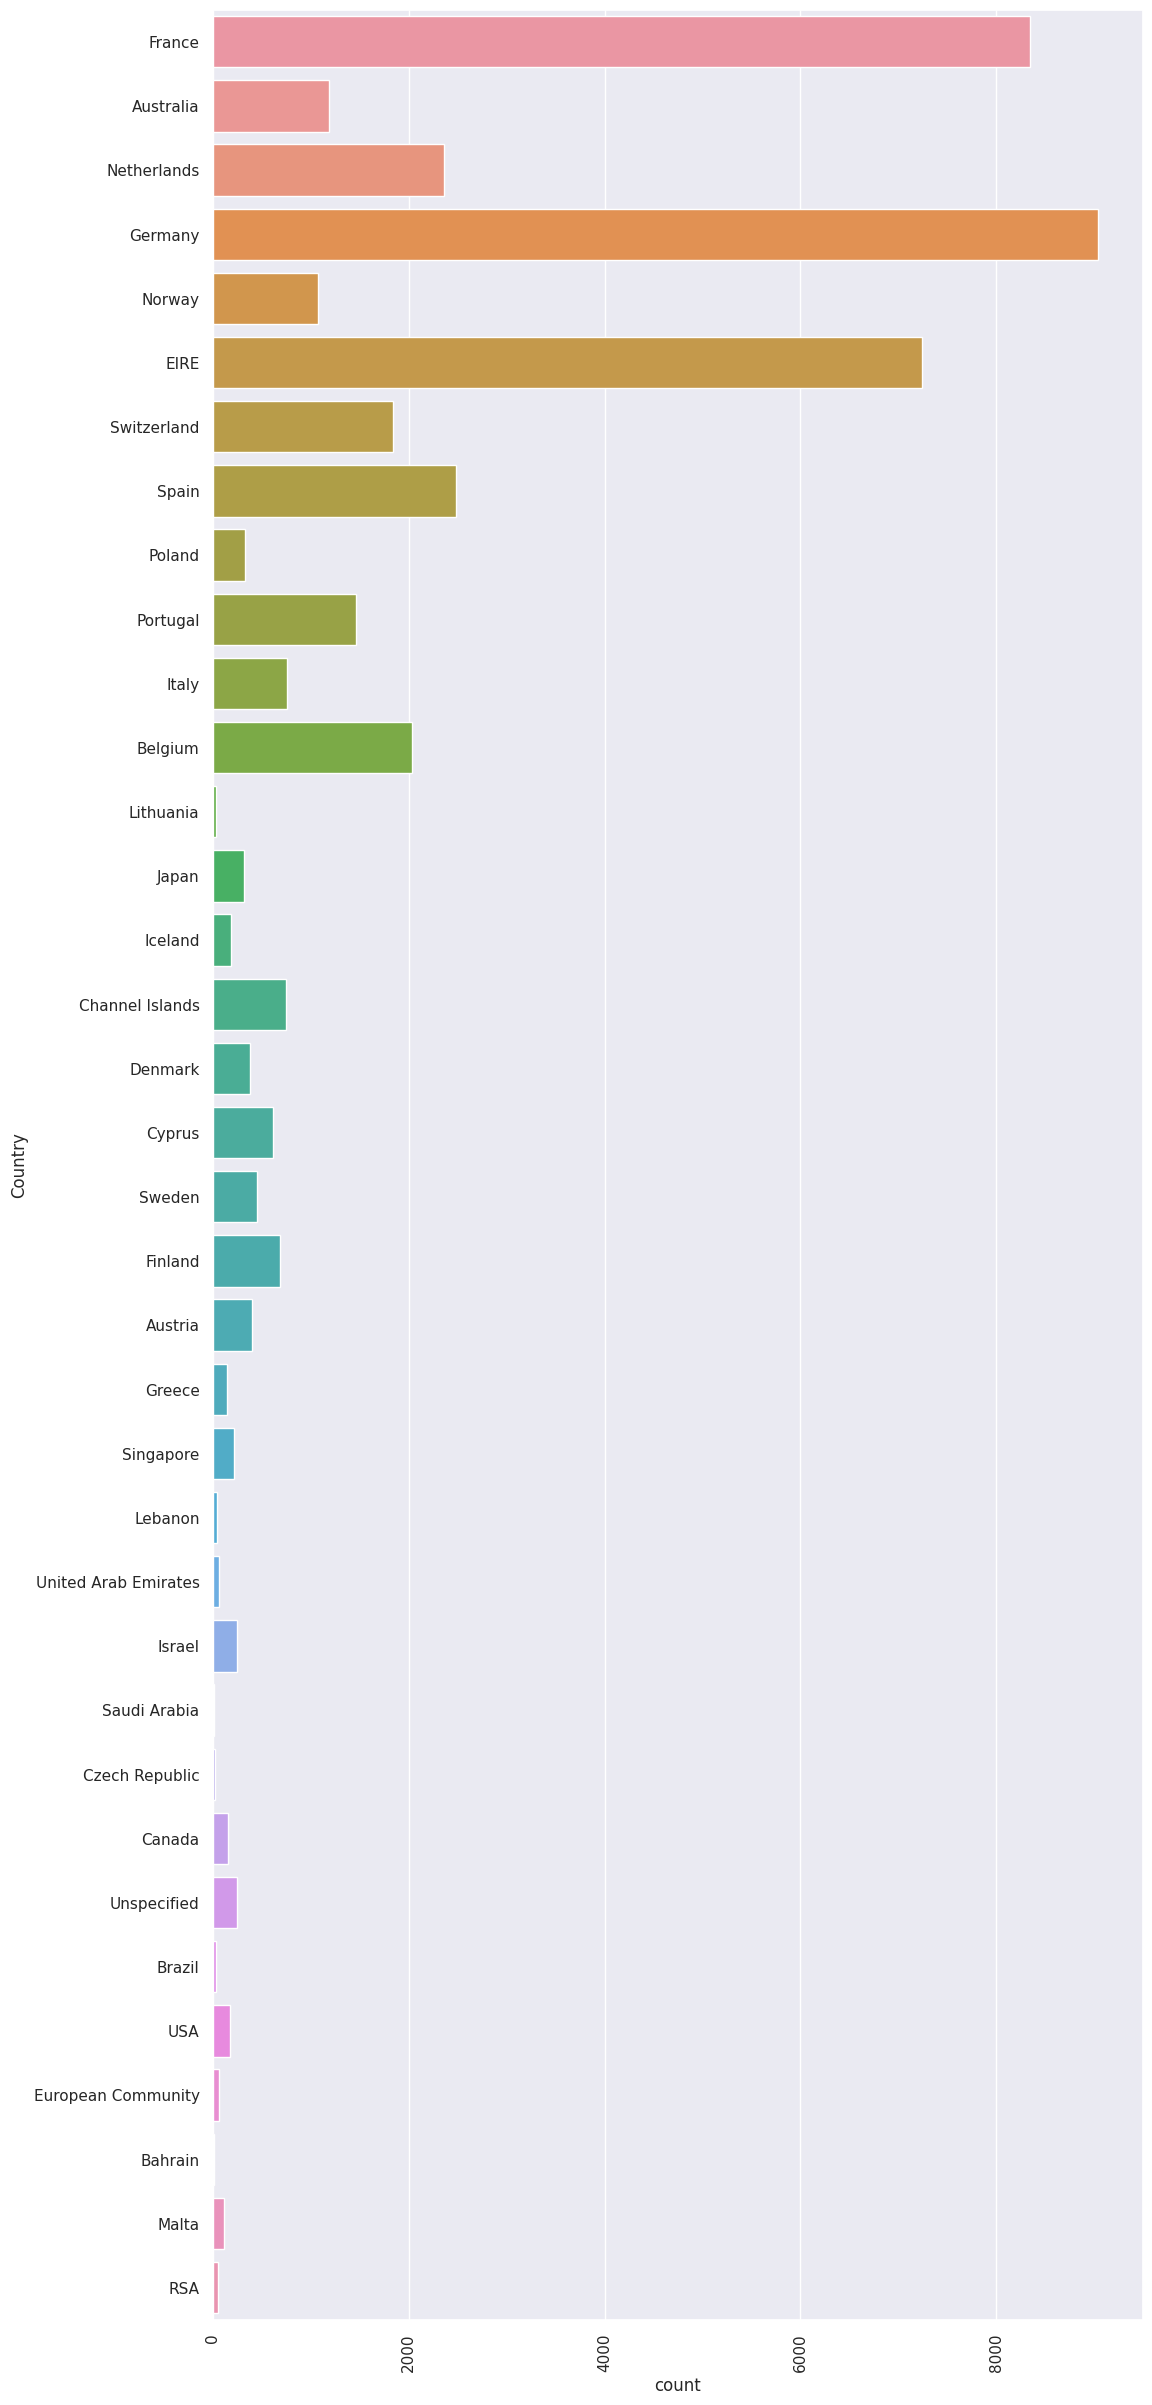

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="Country", data=country)
# print(country["Country"].value_counts())

In [ ]:
data['CustomerID']=data['CustomerID'].astype(int) # convert the ID to int

<ipython-input-22-acd47f0b639a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **User-based Collaborative Filtering**


In [ ]:
# create the user matrix to get the prefrences for each user
customer_matrix = data.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
)

In [ ]:
customer_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
customer_matrix.shape[0]

4339

In [ ]:
# We choose random Cutomer to check.
random_cutomer = np.random.choice(customer_matrix.shape[0])
print("Choosen CustomerID is: ",customer_matrix.index[random_cutomer])

Choosen CustomerID is:  14276


In [ ]:
print(customer_matrix.shape)

(4339, 3665)


In [ ]:
# convert nan to zeros before modeling 
customer_matrix = customer_matrix.applymap(lambda x: 1 if x > 0 else 0) 

In [ ]:
user_item_matrix = csr_matrix(customer_matrix.values)
user_item_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_item_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
random_cutomer

1419

In [ ]:
rondom=customer_matrix.index[random_cutomer]
rondom

14276

In [ ]:
target=customer_matrix.iloc[random_cutomer,:].values.reshape(1,-1)
target

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
distances, indices = model_knn.kneighbors(target, n_neighbors=5)

In [ ]:
len(distances.flatten())

5

In [ ]:
similar_users=[]
distance=[]
for i in range(0, len(distances.flatten())):
    if i != 0:
        similar_users.append(customer_matrix.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i]) 

similar_users

[17669, 18177, 16053, 18257]

In [ ]:
m=pd.Series(similar_users,name='CustomerID')
d=pd.Series(distance,name='distance')
recommend = pd.concat([m,d], axis=1)
recommend = recommend.sort_values('distance',ascending=False)

In [ ]:
print('Similar users for customer ID: {0} \n'.format(customer_matrix.index[random_cutomer]))
for i in range(0,recommend.shape[0]):
    print(' customer_id: {1}, with distance of {2}'.format(i, recommend["CustomerID"].iloc[i], recommend["distance"].iloc[i]))

Similar users for customer ID: 14276 

 customer_id: 18257, with distance of 0.7183936414819239
 customer_id: 16053, with distance of 0.7072415631033513
 customer_id: 18177, with distance of 0.6761757899522298
 customer_id: 17669, with distance of 0.6692407077621106


In [ ]:
items=[]
for t in similar_users:
    items += customer_matrix.loc[t,:][customer_matrix.loc[t,:] > 0].index.tolist()


In [ ]:
items

['20723',
 '20724',
 '20727',
 '21326',
 '21559',
 '21930',
 '21931',
 '21936',
 '21937',
 '21977',
 '22303',
 '22355',
 '22356',
 '22383',
 '22384',
 '22385',
 '22386',
 '22867',
 '23076',
 '23121',
 '23130',
 '23165',
 '23199',
 '23200',
 '23201',
 '23202',
 '23203',
 '23204',
 '23205',
 '23206',
 '23207',
 '23208',
 '23209',
 '23236',
 '23240',
 '23285',
 '23286',
 '23298',
 '23307',
 '23439',
 '23581',
 '23583',
 '85099B',
 '85099F',
 '85123A',
 '20713',
 '20717',
 '20718',
 '20719',
 '20724',
 '20725',
 '20727',
 '20728',
 '20934',
 '21213',
 '21558',
 '21559',
 '21561',
 '21928',
 '21929',
 '21930',
 '21931',
 '21932',
 '21933',
 '21934',
 '21935',
 '21936',
 '21937',
 '21975',
 '21977',
 '22090',
 '22356',
 '22379',
 '22381',
 '22383',
 '22384',
 '22386',
 '23199',
 '23200',
 '23201',
 '23202',
 '23203',
 '23206',
 '23207',
 '23208',
 '23209',
 '23343',
 '23344',
 '23581',
 '23582',
 '35599B',
 '84596L',
 '84990',
 '84991',
 '84992',
 '85099B',
 '85099C',
 '85099F',
 '20668',
 '

In [ ]:
items
print(len(items))

276


In [ ]:
diff_items = list(set(items) - set(customer_matrix.loc[ customer_matrix.index[random_cutomer],:][customer_matrix.loc[ customer_matrix.index[random_cutomer],:] > 0].index.tolist()))

In [ ]:
diff_items
print(len(diff_items))

167


In [ ]:
# recommend the 10 top items to the target user
N = 10
recommended_items = pd.Series(0, index=diff_items).sort_values(ascending=False)[:N].index.tolist()

print('Recommended items for customer ID:', customer_matrix.index[random_cutomer], ':\n', recommended_items)

Recommended items for customer ID: 14276 :
 ['23205', '22666', '22433', '22912', '85014B', '20676', '22432', '22867', '84997D', '22501']


In [ ]:
Recommended_items = pd.DataFrame(columns=['StockCode', 'Description'])

for i, stockcode in enumerate(recommended_items):
    desc = data.loc[data['StockCode'] == stockcode, 'Description'].values[0]
    Recommended_items.loc[i, 'StockCode'] = stockcode  
    Recommended_items.loc[i, 'Description'] = desc 


In [ ]:
Recommended_items

,StockCode,Description
0,23205,CHARLOTTE BAG VINTAGE ALPHABET
1,22666,RECIPE BOX PANTRY YELLOW DESIGN
2,22433,WATERING CAN GREEN DINOSAUR
3,22912,YELLOW COAT RACK PARIS FASHION
4,85014B,RED RETROSPOT UMBRELLA
5,20676,RED RETROSPOT BOWL
6,22432,WATERING CAN PINK BUNNY
7,22867,HAND WARMER BIRD DESIGN
8,84997D,PINK 3 PIECE POLKADOT CUTLERY SET
9,22501,PICNIC BASKET WICKER LARGE


## **Item-based Collaborative Filtering**


In [ ]:
#create the item-item matrix to gey the most similar items
item_matrix=customer_matrix.T
item_matrix

CustomerID,12346,12347,12348,12349,12350,12352,12353,12354,12355,12356,...,18273,18274,18276,18277,18278,18280,18281,18282,18283,18287
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10123C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10124A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DOT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
item_matrix.shape

(3665, 4339)

In [ ]:
#choose random item to check
random_stockcode = np.random.choice(item_matrix.shape[0])
print("Choosen StockCode is: ",item_matrix.index[random_stockcode])

Choosen StockCode is:  22817


In [ ]:
#get the target stockcode of item by using randome index
item_target=item_matrix.index[random_stockcode] 
index_pos = item_matrix.index.get_loc(item_target)
type(item_target)

str

In [ ]:
#calculate the similarity between all items
similarity = cosine_similarity(item_matrix) 
item_similarity= similarity[index_pos]
item_similarity


array([0.10673521, 0.07743386, 0.06750527, ..., 0.07935758, 0.        ,
       0.05565638])

In [ ]:
# Sort the item similarities in descending order
sorted_similarity= item_similarity.argsort()[::-1] #returns sorted arry of indcies/items  with high similarity
print(len(sorted_similarity))

3665


In [ ]:
sorted_similarity

array([1663,  939,   47, ..., 3568, 3569, 2762])

In [ ]:
print(len(sorted_similarity))

3665


In [ ]:
#get the top 10 items that are the most similar to the target item
num_similar_items = 10
similar_items = []
for idx in sorted_similarity:
    if item_matrix.index[idx] != item_target: #check the other similar items
        similar_items.append(item_matrix.index[idx])
        if len(similar_items) == num_similar_items:
            break

In [ ]:
similar_items

['22037',
 '16161U',
 '22029',
 '22712',
 '22718',
 '22026',
 '22815',
 '21504',
 '22027',
 '22819']

In [ ]:
# recommend the 10 top items simialr to the target item
stockcode_desc = data[data['StockCode'] == item_target]['Description'].iloc[0]
print('Recommended items for StackCode:', item_target,"with decription",stockcode_desc,":\n",similar_items )

Recommended items for StackCode: 22817 with decription CARD SUKI BIRTHDAY :
 ['22037', '16161U', '22029', '22712', '22718', '22026', '22815', '21504', '22027', '22819']


In [ ]:
items_Recomendation = pd.DataFrame(columns=['StockCode', 'Description'])

for i, stockcode in enumerate(similar_items):
    desc = data[data['StockCode'] == stockcode]['Description'].iloc[0]
    items_Recomendation.loc[i, 'StockCode'] = stockcode  
    items_Recomendation.loc[i, 'Description'] = desc

In [ ]:
items_Recomendation

,StockCode,Description
0,22037,ROBOT BIRTHDAY CARD
1,16161U,WRAP SUKI AND FRIENDS
2,22029,SPACEBOY BIRTHDAY CARD
3,22712,CARD DOLLY GIRL
4,22718,CARD CAT AND TREE
5,22026,BANQUET BIRTHDAY CARD
6,22815,CARD PSYCHEDELIC APPLES
7,21504,SKULLS GREETING CARD
8,22027,TEA PARTY BIRTHDAY CARD
9,22819,"BIRTHDAY CARD, RETRO SPOT"
